In [1]:
import sys
sys.path.insert(0, 'F:/Workspace/idx2/build/Source/Python/RelWithDebInfo')
import idx2Py as i2p
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import *

In [2]:
%%time
input_dir  = 'D:/Datasets/nasa/llc_2160_32'
downsampling = [2, 2, 0]
accuracy = 0.1
vmin = -6.14770936965942382812
vmax = 1.24035537242889404297

CPU times: total: 0 ns
Wall time: 0 ns


# Visualize a single face through time

In [3]:
%matplotlib inline
print(downsampling)
array = i2p.Decode3f32('D:/Datasets/nasa/llc_2160_32/llc2160/u-face-1-depth-3-time-0-32.idx2', input_dir, downsampling, accuracy)
plot = None
def f(t): # get time step t
  fig = plt.figure(figsize = (4, 12))
  plot = plt.imshow(array[t, :, :], origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  # plot.set_data(array[t, ::2, ::2])
  plt.show()
  return

interact(f, t = widgets.IntSlider(min = 0, max = array.shape[0] - 1, step = 1, value = 0, layout = Layout(width = '500px')));


[2, 2, 0]


interactive(children=(IntSlider(value=0, description='t', layout=Layout(width='500px'), max=31), Output()), _d…

# Visualize four faces through time

interactive(children=(IntSlider(value=0, description='t', layout=Layout(width='500px'), max=31), Output()), _d…

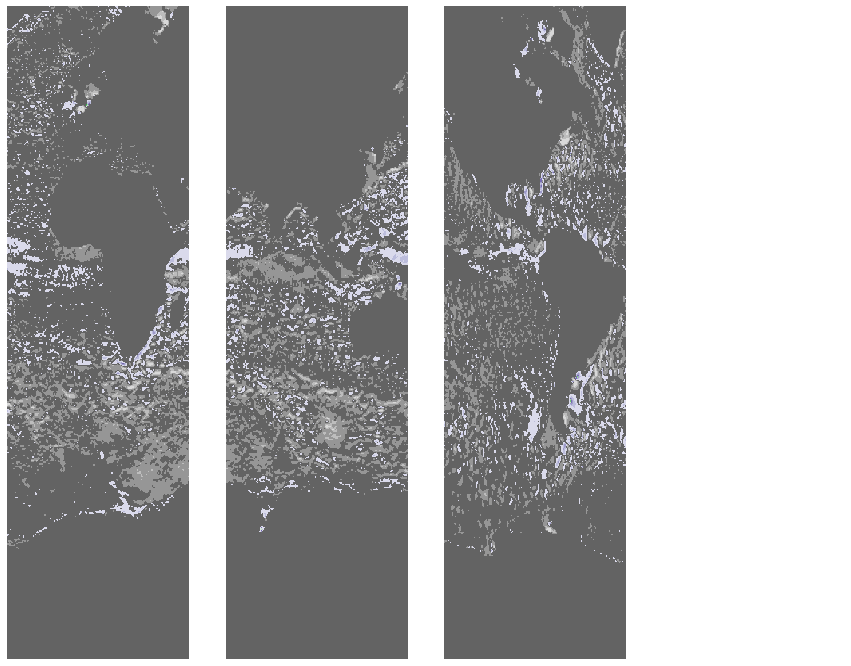

In [4]:
import concurrent.futures

%matplotlib inline
array0 = None
array1 = None
array3 = None
array4 = None

with concurrent.futures.ThreadPoolExecutor() as executor:
    accuracy = 0.01
    future0 = executor.submit(i2p.Decode3f32, 'D:/Datasets/nasa/llc_2160_32/llc2160/u-face-0-depth-3-time-0-32.idx2', input_dir, downsampling, accuracy)    
    future1 = executor.submit(i2p.Decode3f32, 'D:/Datasets/nasa/llc_2160_32/llc2160/u-face-1-depth-3-time-0-32.idx2', input_dir, downsampling, accuracy)
    future3 = executor.submit(i2p.Decode3f32, 'D:/Datasets/nasa/llc_2160_32/llc2160/u-face-3-depth-3-time-0-32.idx2', input_dir, downsampling, accuracy)
    future4 = executor.submit(i2p.Decode3f32, 'D:/Datasets/nasa/llc_2160_32/llc2160/u-face-4-depth-3-time-0-32.idx2', input_dir, downsampling, accuracy)
    array0 = future0.result()
    array1 = future1.result()
    array3 = future3.result()
    array4 = future4.result()


# vmin = min(np.min(array0), np.min(array1), np.min(array3), np.min(array4))
# vmax = max(np.max(array0), np.max(array1), np.max(array3), np.max(array4))

def f(t): # get time step t
  fig, ((ax0, ax1, ax3, ax4)) = plt.subplots(1, 4, figsize=([15, 12]))
  ax0.axis('off')
  ax1.axis('off')
  ax3.axis('off')
  ax4.axis('off')
  ax0.imshow(array0[t, ::4, ::4], origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  ax1.imshow(array1[t, ::4, ::4], origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  ax3.imshow(np.rot90(array3[t, ::4, ::4]), origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  ax4.imshow(np.rot90(array4[t, ::4, ::4]), origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)  
  return  

interact(f, t = widgets.IntSlider(min = 0, max = array1.shape[0] - 1, step = 1, value = 0, layout = Layout(width = '500px')));

# Visualize four faces through depths

In [5]:
%matplotlib inline
level = 2
accuracy = 0.1

def f(d): # get time step t
  array0 = i2p.Decode3f32('D:/Datasets/nasa/llc_2160_32/llc2160/u-face-0-depth-' + repr(d) + '-time-0-32.idx2', input_dir, downsampling, accuracy)
  array1 = i2p.Decode3f32('D:/Datasets/nasa/llc_2160_32/llc2160/u-face-1-depth-' + repr(d) + '-time-0-32.idx2', input_dir, downsampling, accuracy)
  array3 = i2p.Decode3f32('D:/Datasets/nasa/llc_2160_32/llc2160/u-face-3-depth-' + repr(d) + '-time-0-32.idx2', input_dir, downsampling, accuracy)
  array4 = i2p.Decode3f32('D:/Datasets/nasa/llc_2160_32/llc2160/u-face-4-depth-' + repr(d) + '-time-0-32.idx2', input_dir, downsampling, accuracy)
  fig, ((ax0, ax1, ax3, ax4)) = plt.subplots(1, 4, figsize=([15, 12]))
  ax0.axis('off')
  ax1.axis('off')
  ax3.axis('off')
  ax4.axis('off')
  ax0.imshow(array0[0, ::2, ::2], origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  ax1.imshow(array1[0, ::2, ::2], origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  ax3.imshow(np.rot90(array3[0, ::2, ::2]), origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  ax4.imshow(np.rot90(array4[0, ::2, ::2]), origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)  
  return  

interact(f, d = widgets.IntSlider(min = 0, max = 89, step = 1, value = 0, layout = Layout(width = '800px')));

interactive(children=(IntSlider(value=0, description='d', layout=Layout(width='800px'), max=89), Output()), _d…

# Vertical slicing along x

In [6]:
%matplotlib inline
level = 3
accuracy = 0.1

def f(x): # get time step t
  face = x // 2160
  xx = x % 2160
  # print(face)
  # print(xx)
  nx = 0 # TODO: figure this out from x
  ny = 90
  array = None
  for d in range(0, 90):    
    extent = (xx, 0, 0, xx, 2160 * 3 - 1, 0)
    if (face > 2):
      extent = (0, xx, 0, 2160 * 3 - 1, xx, 0)
    a = i2p.DecodeExtent3f32('D:/Datasets/nasa/llc_2160_32/llc2160/u-face-' + repr(face) + '-depth-' + repr(d) + '-time-0-32.idx2', input_dir, extent, downsampling, accuracy)
    if d == 0:
      # print(a.shape)
      nx = a.shape[1]
      array = np.empty((ny, nx))
    if (face > 2):
      a = np.rot90(a)
    array[d, :] = a[0, :, (xx * a.shape[2]) // 2160]

  fig = plt.plot(figsize = ([512, 48]))
  plt.imshow(array, origin = 'lower', cmap = 'tab20c', aspect = 'auto', vmin = vmin, vmax = vmax)
  plt.show()
  return

interact(f, x = widgets.IntSlider(min = 0, max = 8639, step = 10, value = 0, layout = Layout(width = '800px')));

interactive(children=(IntSlider(value=0, description='x', layout=Layout(width='800px'), max=8639, step=10), Ou…